### Geometric Transformations of Images
Learn to apply different geometric transformations to images, like translation, rotation, affine transformation etc.

You will see these functions: cv.getPerspectiveTransform

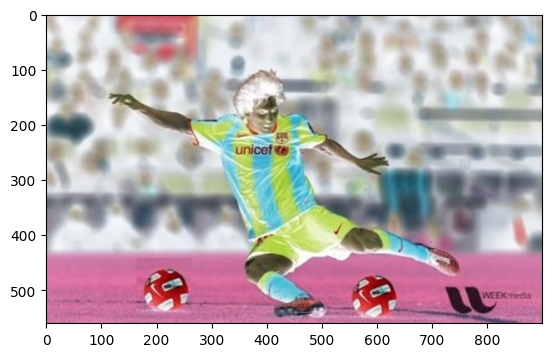

In [3]:
from matplotlib import pyplot as plt
# Scaling
# Scaling is just resizing of the image. OpenCV comes with a function cv.resize() for this purpose.


import numpy as np
import cv2 as cv

img = cv.imread('messi5.jpg')
img = cv.bitwise_not(img)
assert img is not None, "file could not be read, check with os.path.exists()"

res = cv.resize(img,None,fx=2, fy=2, interpolation = cv.INTER_CUBIC)

#OR

height, width = img.shape[:2]
res = cv.resize(img,(2*width, 2*height), interpolation = cv.INTER_CUBIC)
plt.imshow(res)
plt.show()

### Translation
Translation is the shifting of an object's location.


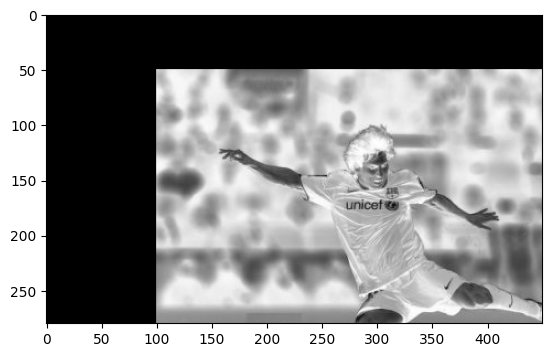

In [22]:
import numpy as np
import cv2 as cv

# img = cv.imread('messi5.jpg', cv.IMREAD_GRAYSCALE)
img = cv.imread('messi5.jpg', cv.IMREAD_GRAYSCALE)
img = cv.bitwise_not(img)
assert img is not None, "file could not be read, check with os.path.exists()"
rows,cols = img.shape

M = np.float32([[1,0,100],[0,1,50]])
dst = cv.warpAffine(img,M,(cols,rows))

plt.imshow(dst,cmap="gray")
plt.show()

### Rotation

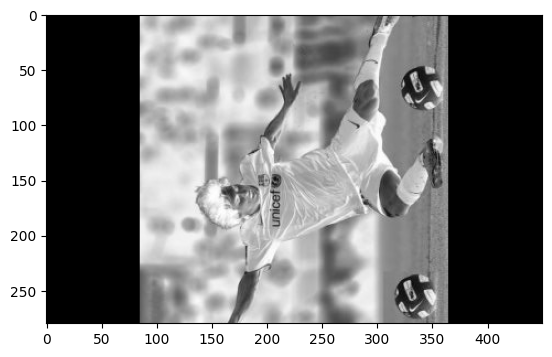

In [24]:
img = cv.imread('messi5.jpg', cv.IMREAD_GRAYSCALE)
img = cv.bitwise_not(img)
assert img is not None, "file could not be read, check with os.path.exists()"
rows,cols = img.shape

# cols-1 and rows-1 are the coordinate limits.
M = cv.getRotationMatrix2D(((cols-1)/2.0,(rows-1)/2.0),90,1)
dst = cv.warpAffine(img,M,(cols,rows))

plt.imshow(dst,cmap="gray")
plt.show()

### Affine Transformation
In affine transformation, all parallel lines in the original image will still be parallel in the output image

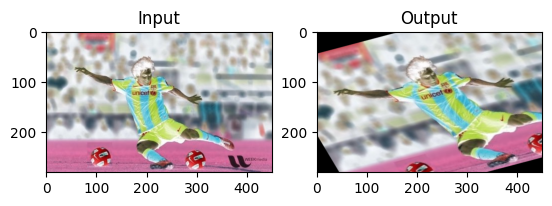

In [25]:
img = cv.imread('messi5.jpg')
img = cv.bitwise_not(img)
assert img is not None, "file could not be read, check with os.path.exists()"
rows,cols,ch = img.shape

pts1 = np.float32([[50,50],[200,50],[50,200]])
pts2 = np.float32([[10,100],[200,50],[100,250]])

M = cv.getAffineTransform(pts1,pts2)

dst = cv.warpAffine(img,M,(cols,rows))

plt.subplot(121),plt.imshow(img),plt.title('Input')
plt.subplot(122),plt.imshow(dst),plt.title('Output')
plt.show()

### Perspective Transformation
For perspective transformation, you need a 3x3 transformation matrix. Straight lines will remain straight even after the transformation. To find this transformation matrix, you need 4 points on the input image and corresponding points on the output image. Among these 4 points, 3 of them should not be collinear.

768 1024 3


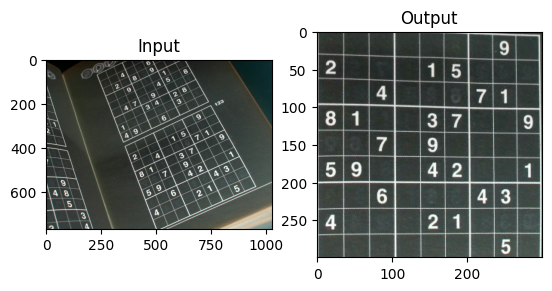

In [64]:
img = cv.imread('sudoku.png')
img = cv.bitwise_not(img)
assert img is not None, "file could not be read, check with os.path.exists()"
rows,cols,ch = img.shape
print(rows,cols,ch)
# pts1 = np.float32([[56,65],[368,52],[28,387],[389,390]])
pts1 = np.float32([[360,400],[750,200],[500,768], [955,570]])
pts2 = np.float32([[0,0],[300,0],[0,300],[300,300]])

M = cv.getPerspectiveTransform(pts1,pts2)

dst = cv.warpPerspective(img,M,(300,300))

plt.subplot(121),plt.imshow(img),plt.title('Input')
plt.subplot(122),plt.imshow(dst),plt.title('Output')
plt.show()

### Smoothing Images
Blur images with various low pass filters

Apply custom-made filters to images (2D convolution)

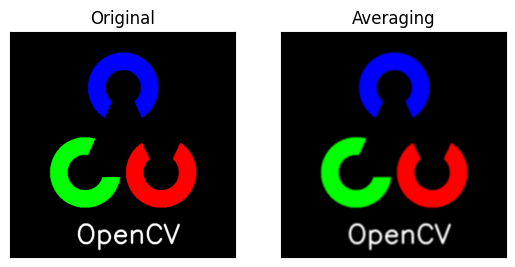

In [69]:
# 2D Convolution ( Image Filtering )
# As in one-dimensional signals, images also can be filtered with various low-pass filters (LPF), high-pass filters (HPF), etc. LPF helps in removing noise, blurring images, etc. HPF filters help in finding edges in images.

import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
img = cv.imread('opencv-logo.png')
assert img is not None, "file could not be read, check with os.path.exists()"
kernel = np.ones((5,5),np.float32)/25
dst = cv.filter2D(img,-1,kernel)
plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(dst),plt.title('Averaging')
plt.xticks([]), plt.yticks([])
plt.show()

### Image Blurring (Image Smoothing)
Averaging

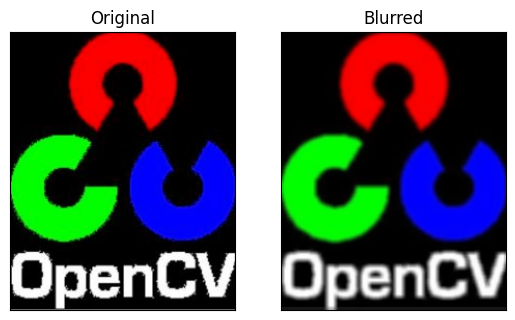

In [67]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
img = cv.imread('logo-white.png')
assert img is not None, "file could not be read, check with os.path.exists()"
blur = cv.blur(img,(5,5))
plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(blur),plt.title('Blurred')
plt.xticks([]), plt.yticks([])
plt.show()

Gaussian Blurring

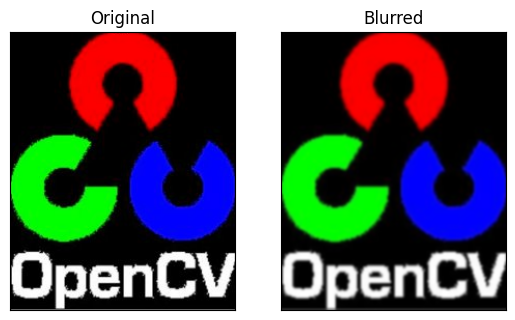

In [70]:
img = cv.imread('logo-white.png')
blur = cv.GaussianBlur(img,(5,5),0)
plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(blur),plt.title('Blurred')
plt.xticks([]), plt.yticks([])
plt.show()

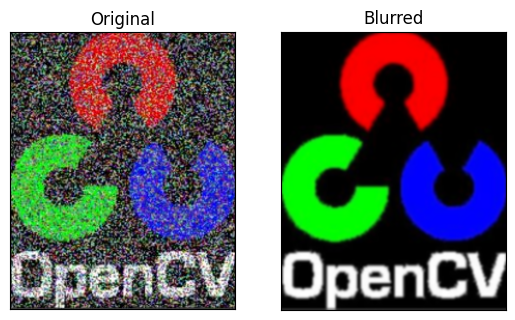

In [74]:
img = cv.imread('logo-noize.png')
median = cv.medianBlur(img,5)
plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(blur),plt.title('Blurred')
plt.xticks([]), plt.yticks([])
plt.show()

Bilateral Filtering
cv.bilateralFilter() is highly effective in noise removal while keeping edges sharp.

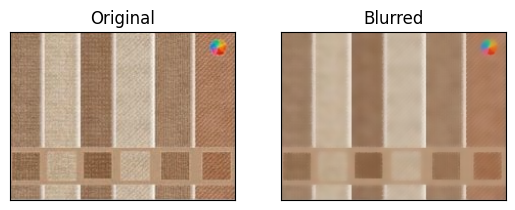

In [76]:
img = cv.imread('biliteral-pic.png')
img = cv.bitwise_not(img)
blur = cv.bilateralFilter(img,9,75,75)
plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(blur),plt.title('Blurred')
plt.xticks([]), plt.yticks([])
plt.show()